In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

In [40]:
data_path = "../share_w6_retirees_w9_clean - share_w6_retirees_w9_clean.csv"

In [41]:
df = pd.read_csv(data_path)

In [42]:
df.head()

,mergeid,hhid6,mergeidp6,coupleid6,country,language,ac011__1,ac012__1,ac014__1,ac015__1,...,ep064d1_7_w9,ep064d2_7_w9,ep064d3_7_w9,ep064d4_7_w9,ep064d5_7_w9,ep064d6_7_w9,ep064d7_7_w9,ep064d8_7_w9,ep064d9_7_w9,ep064d10_7_w9
0,AT-022659-01,AT-022659-A,AT-022659-02,AT-022659-01-02,11,11,1.0,8.0,3.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AT-022659-02,AT-022659-A,AT-022659-01,AT-022659-01-02,11,11,1.0,9.0,2.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AT-022738-03,AT-022738-A,AT-022738-01,AT-022738-01-03,11,11,1.0,9.0,4.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AT-058892-03,AT-058892-A,AT-058892-02,AT-058892-02-03,11,11,1.0,10.0,4.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AT-059781-01,AT-059781-A,AT-059781-02,AT-059781-01-02,11,11,1.0,10.0,4.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
df.shape

(1394, 127)

In [ ]:
df = df.loc[:, df.isnull().mean() < 0.5]

In [44]:
df.isna().sum()>0

mergeid          False
hhid6            False
mergeidp6         True
coupleid6         True
country          False
                 ...  
ep064d6_7_w9     False
ep064d7_7_w9     False
ep064d8_7_w9     False
ep064d9_7_w9     False
ep064d10_7_w9    False
Length: 127, dtype: bool

In [45]:
df.shape

(1394, 127)

In [61]:
object_cols = df.select_dtypes(include='object')

In [65]:
df.drop(columns=object_cols.columns, inplace=True)

In [66]:
df

,country,language,ac011__1,ac012__1,ac014__1,ac015__1,ac016__1,ac017__1,ac018__1,ac019__1,...,ep064d1_7_w9,ep064d2_7_w9,ep064d3_7_w9,ep064d4_7_w9,ep064d5_7_w9,ep064d6_7_w9,ep064d7_7_w9,ep064d8_7_w9,ep064d9_7_w9,ep064d10_7_w9
0,11,11,1.0,8.0,3.0,3.0,4.0,1.0,2.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11,11,1.0,9.0,2.0,3.0,4.0,2.0,2.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11,11,1.0,9.0,4.0,4.0,4.0,1.0,3.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11,11,1.0,10.0,4.0,4.0,4.0,1.0,3.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11,11,1.0,10.0,4.0,3.0,4.0,1.0,4.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,13,13,1.0,8.0,3.0,3.0,3.0,1.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1390,13,13,1.0,10.0,3.0,3.0,4.0,1.0,2.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1391,13,13,1.0,9.0,3.0,4.0,4.0,1.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1392,13,13,1.0,10.0,4.0,3.0,4.0,1.0,4.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Columns: 123 entries, country to ep064d10_7_w9
dtypes: float64(120), int64(3)
memory usage: 1.3 MB


## Imputation


In [50]:
df_new.fillna(0, inplace=True)

In [51]:
y = df_new['ep036__7']
X = df_new.drop(columns=['ep036__7'])


In [52]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Further split train+val into training and validation sets (e.g., 75% train, 25% val)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val
)

In [53]:
pipeline = Pipeline([
    ('clf', DecisionTreeClassifier(random_state=42))
])

param_grid = {
    'clf__criterion': ['gini', 'entropy', 'log_loss'],
    'clf__max_depth': [None, 3, 5, 10],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

# 5. Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 6. Use GridSearchCV for tuning
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# 7. Fit model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/home/metaphysicist/Coding/2025/opencampus/Aging/.venv/lib/python3.10/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('clf',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'clf__criterion': ['gini', 'entropy', 'log_loss'],
                         'clf__max_depth': [None, 3, 5, 10],
                         'clf__min_samples_leaf': [1, 2, 4],
                         'clf__min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [54]:
best_model = grid_search.best_estimator_.named_steps['clf']
best_model

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10,
                       random_state=42)

estimator


### plot d tree


In [55]:
X_train.columns

Index(['country', 'language', 'ac011__1', 'ac012__1', 'ac014__1', 'ac015__1',
       'ac016__1', 'ac017__1', 'ac018__1', 'ac019__1',
       ...
       'ep064d1_7_w9', 'ep064d2_7_w9', 'ep064d3_7_w9', 'ep064d4_7_w9',
       'ep064d5_7_w9', 'ep064d6_7_w9', 'ep064d7_7_w9', 'ep064d8_7_w9',
       'ep064d9_7_w9', 'ep064d10_7_w9'],
      dtype='object', length=122)

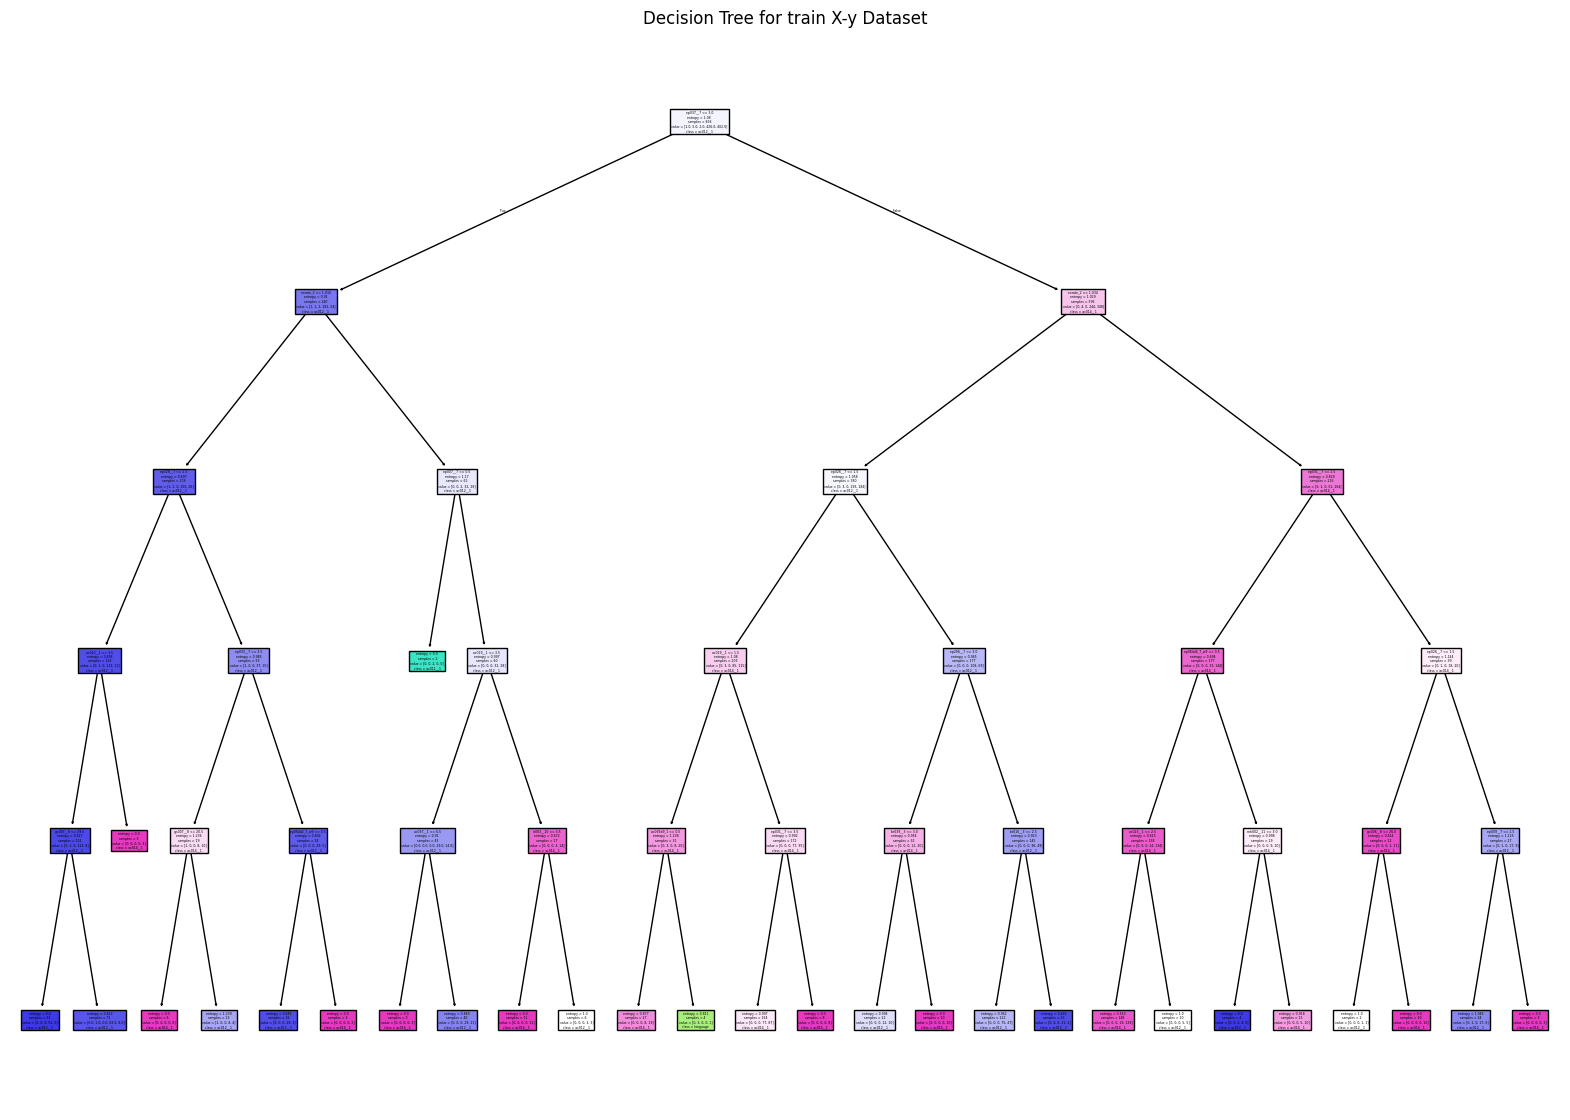

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(20, 14))
plot_tree(best_model, feature_names=X_train.columns, class_names=X_train.columns, filled=True)
plt.title("Decision Tree for train X-y Dataset")
plt.show()
plt.savefig('docs/decision_tree.png')


In [ ]:
tree_rules = export_text(best_model, feature_names=list(X_train.columns))

# Save to a text file
with open("docs/decision_tree_rules.txt", "w") as f:
    f.write(tree_rules)

In [58]:
# 8. Print best parameters and CV score
print("Best Params:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

# 9. Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("Test Classification Report:\n", classification_report(y_test, y_pred))

Best Params: {'clf__criterion': 'entropy', 'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 10}
Best CV Accuracy: 0.6519033361847734

Test Accuracy: 0.6308243727598566
Test Classification Report:
               precision    recall  f1-score   support

        -2.0       0.00      0.00      0.00         1
        -1.0       0.00      0.00      0.00         2
         1.0       0.66      0.59      0.62       142
         5.0       0.61      0.69      0.64       134

    accuracy                           0.63       279
   macro avg       0.32      0.32      0.32       279
weighted avg       0.63      0.63      0.63       279



/home/metaphysicist/Coding/2025/opencampus/Aging/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/metaphysicist/Coding/2025/opencampus/Aging/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/metaphysicist/Coding/2025/opencampus/Aging/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [59]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 5. Evaluate on validation set
val_preds = clf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, val_preds))
print("Validation Report:\n", classification_report(y_val, val_preds))

# 6. Retrain on train+val for final model
clf_final = DecisionTreeClassifier(random_state=42)
clf_final.fit(X_train_val, y_train_val)

# 7. Evaluate on test set
test_preds = clf_final.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, test_preds))
print("Test Report:\n", classification_report(y_test, test_preds))

Validation Accuracy: 0.6057347670250897
Validation Report:
               precision    recall  f1-score   support

        -2.0       0.00      0.00      0.00         1
        -1.0       0.00      0.00      0.00         2
         1.0       0.62      0.60      0.61       142
         5.0       0.60      0.63      0.61       134

    accuracy                           0.61       279
   macro avg       0.30      0.31      0.31       279
weighted avg       0.60      0.61      0.60       279

Test Accuracy: 0.5842293906810035
Test Report:
               precision    recall  f1-score   support

        -2.0       0.00      0.00      0.00         1
        -1.0       0.00      0.00      0.00         2
         1.0       0.60      0.61      0.60       142
         5.0       0.58      0.57      0.58       134

    accuracy                           0.58       279
   macro avg       0.30      0.30      0.30       279
weighted avg       0.58      0.58      0.58       279



/home/metaphysicist/Coding/2025/opencampus/Aging/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/metaphysicist/Coding/2025/opencampus/Aging/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/metaphysicist/Coding/2025/opencampus/Aging/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 